In [6]:
import sys
import os

gpy_path = 'C:/Users/sangh/Documents/GitHub/GPy' 
sys.path.append(gpy_path)

import GPy
print(GPy.__version__) # 설치 확인

ModuleNotFoundError: No module named 'numpy.lib.function_base'

In [4]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from collections import namedtuple
# import paramz.optimization as optim

from data import data_generator
from model import singleGP
from GPtools.utils import gradCheck
from GPtools.optimizer import SCG

params_rbf = namedtuple(
    'params_rbf', ['prec', 'var']
)

ModuleNotFoundError: No module named 'GPy'

In [ ]:
#### Gaussian process regression ####

# Configuration
PARAMS = params_rbf(prec=16., var=1.)
SIG = .1
X = np.linspace(-1, 1, num=100)[:,None]

In [3]:
pip install paramz

Note: you may need to restart the kernel to use updated packages.


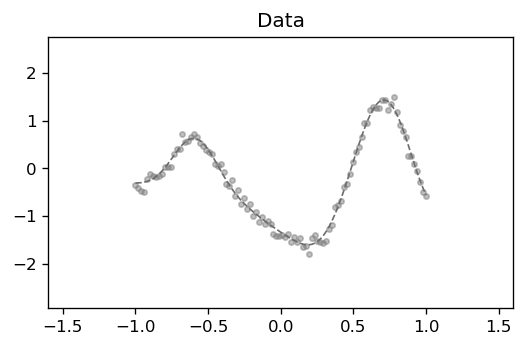

In [3]:
#### Synthetic data generation ####

# Generate data 
generator = data_generator(X=X, func='Gaussian')
bdata = generator.generate(params=PARAMS, sig=SIG)

# Plot data
fig, ax = plt.subplots(facecolor='white', dpi=120, figsize=(5,3))

ax.set_title('Data')
ax.set_xlim([-1.6, 1.6])
ax.set_ylim([
    np.min(bdata.ytrue)-1.5*np.std(bdata.ytrue), 
    np.max(bdata.ytrue)+1.5*np.std(bdata.ytrue)
])
ax.plot(bdata.X, bdata.ytrue,
    c='#6C6C6C', linestyle='--', linewidth=1)
ax.scatter(bdata.X, bdata.y, c='grey', s=10, alpha=0.5)

In [4]:
#### GP model inference ####

# GP model
gpmodel = singleGP(X=bdata.X, y=bdata.y)

# Initial parameters
H = np.array([np.log(1e+3), np.log(1e+3), np.log(1e+3)])

# Check analytic gradients vs numerical gradients
gradCheck(x=H, f=gpmodel.nll, fp=gpmodel.grad_nll)

# Optimize hyperparameters
print("\n--> Optimize a GP model")
H_est, obj_log, n_func_eval, status = SCG(
    x=H, f=gpmodel.nll, gradf=gpmodel.grad_nll, verbose=True
)

--> Gradient Check!
param 0       |analytic:   4.988323 |numerical:   4.988323 |diff: -0.0000
param 1       |analytic:  15.263796 |numerical:  15.263796 |diff:  0.0000
param 2       |analytic:  34.727066 |numerical:  34.727066 |diff: -0.0000

--> Optimize a GP model
iter: 1  |  obj: 462.6537
iter: 2  |  obj: 166.8996
iter: 3  |  obj: 166.8996
iter: 4  |  obj: 166.8996
iter: 5  |  obj: 41.9062
iter: 6  |  obj: 41.9062
iter: 7  |  obj: -43.5694
iter: 8  |  obj: -50.6004
iter: 9  |  obj: -58.2609
iter: 10  |  obj: -58.8686
iter: 11  |  obj: -59.1317
iter: 12  |  obj: -59.9292
iter: 13  |  obj: -60.5638
iter: 14  |  obj: -60.6597
iter: 15  |  obj: -60.6933
iter: 16  |  obj: -60.7205
iter: 17  |  obj: -60.7280
iter: 18  |  obj: -60.7309
iter: 19  |  obj: -60.7341
iter: 20  |  obj: -60.7345
iter: 21  |  obj: -60.7346
iter: 22  |  obj: -60.7346
iter: 23  |  obj: -60.7347


In [5]:
#### Prediction at new locations (Xstar) ####

# prediction
Xstar = np.linspace(-2, 2, num=500)[:, None]
E_f, Var_f, Var_y = gpmodel.predict(Xstar)

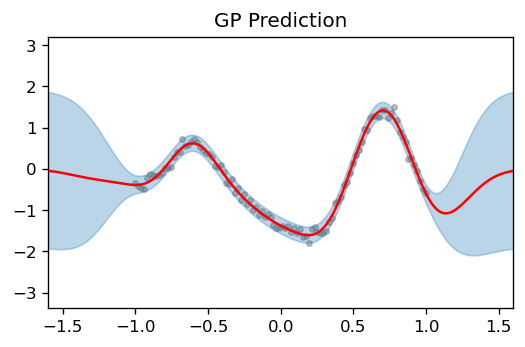

In [6]:
# Plot prediction
fig, ax = plt.subplots(facecolor='white', dpi=120, figsize=(5,3))

ax.set_title('GP Prediction')
ax.set_xlim([-1.6, 1.6])
ax.set_ylim([
    np.min(bdata.ytrue)-2.*np.std(bdata.ytrue), 
    np.max(bdata.ytrue)+2.*np.std(bdata.ytrue)
])
ax.scatter(bdata.X, bdata.y, c='grey', s=10, alpha=0.5)

ax.plot(Xstar, E_f, c='red')
ax.fill_between(
        Xstar.flatten(), 
        E_f.flatten() - 1.96*np.diag(Var_y**.5).flatten(),
        E_f.flatten() + 1.96*np.diag(Var_y**.5).flatten(),
        color='#1f77b4',
        alpha=0.3,
)